In [1]:
#Search for specific terms within a corpus of texts
#texts used are txt files of pubmed "Disorders of Consciousness" abstracts
#15068 abstracts considered relevant after TM (references already removed). aal dictionary used
#Outputs: bar graph of all dictionary terms + BoW of corpus
#Outputs: term document matrix as a csv in downloads

In [2]:
import functions

In [3]:
dict_path = "/Users/manojarachige/Documents/Coding/BMedScDOC1/Assets/Inputs/aalbi_dictionary.txt"
corpus_dir = "/Users/manojarachige/Documents/Coding/BMedScDOC1/Assets/Abstracts"
replacement_path = "/Users/manojarachige/Documents/Coding/BMedScDOC1/Assets/Inputs/aalbi.csv"

In [4]:
#define the lists we'll need for outputs

dictionary = []

combined = [] #For pathway 2 - total dictionary list

docs = []

In [5]:
doc_list = functions.os_level.get_corpus(corpus_dir, "txt")

In [6]:
print("We have a total of {} abstracts".format(len(doc_list)))

We have a total of 15068 abstracts


In [7]:
dictionary = functions.os_level.makedict(dict_path)

In [8]:
def action(i, doc_list, dictionary):
    
    text = maketxt("{}".format(corpus_dir) + "/{}".format(doc_list[i]), replacement_path)
        
    #remove non-dictionary words
    text = rem_dict(dictionary,text) 
        
    #add to Total List for Combined BoW later
    combined.extend(text) 
        
    #check corpus doc again
        
    #add to list of text strings for tdm
    doc_for_tdm = " ".join(text)
    docs.append(doc_for_tdm)
    
    
    
#Create list of words appearing in txt file 
def maketxt(text, csv_path):
    string = ''
    with open(text) as file:
        string = file.read()
        return functions.processing.preprocess(string, csv_path)
    
#Remove words not in the dictionary NOTE: Will find words within words ie. bar within bars
def rem_dict(dictionary, doc):
    new_doc = []
    for i in range(len(doc)):
        for j in range(len(dictionary)):
            if dictionary[j] in doc[i]:
                new_doc.append(dictionary[j])
    return new_doc

In [9]:
for i in range(len(doc_list)):
            action(i, doc_list, dictionary)

In [10]:
save_location = "/Users/manojarachige/Downloads/"

import pandas as pd

def display(combined, csv_path):
    df = pd.read_csv(csv_path)
    for i in range(len(df)): #python replace items in a loop
        for j in range(len(combined)):
            if df["Replacement"][i] == combined[j]:
                combined[j] = df["Display"][i]
    return combined

In [11]:
#output 1
df = functions.outputs.tdm_make(docs)
df.to_csv(r'{}TDM.csv'.format(save_location))

Total>>> [('thalamus', 569), ('cerebellum', 245), ('hippocampus', 182), ('amygdala', 114), ('cuneus', 97), ('precuneus', 90), ('anterior cingulate', 76), ('caudate nucleus', 66), ('posterior cingulate', 59), ('supplementary motor area', 23), ('rolandic operculum', 21), ('fusiform gyrus', 20), ('vermis', 17), ('superior temporal gyrus', 17), ('parahippocampal', 16), ('inferior frontal gyrus, opercular part', 16), ('pallidum', 15), ('superior frontal gyrus', 15), ('putamen', 14), ('supramarginal gyrus', 14), ('inferior parietal lobule', 13), ('middle frontal gyrus', 12), ('postcentral gyrus', 12), ('inferior temporal gyrus', 8), ('temporal pole: superior temporal gyrus', 7), ('paracentral lobule', 6), ('calcarine', 6), ('middle temporal gyrus', 6), ('middle occipital gyrus', 6), ('superior parietal lobule', 5), ('middle cingulate', 5), ("heschl's gyrus", 5), ('lateral orbital gyrus', 3), ('inferior occipital gyrus', 2), ('posterior orbital gyrus', 1)]


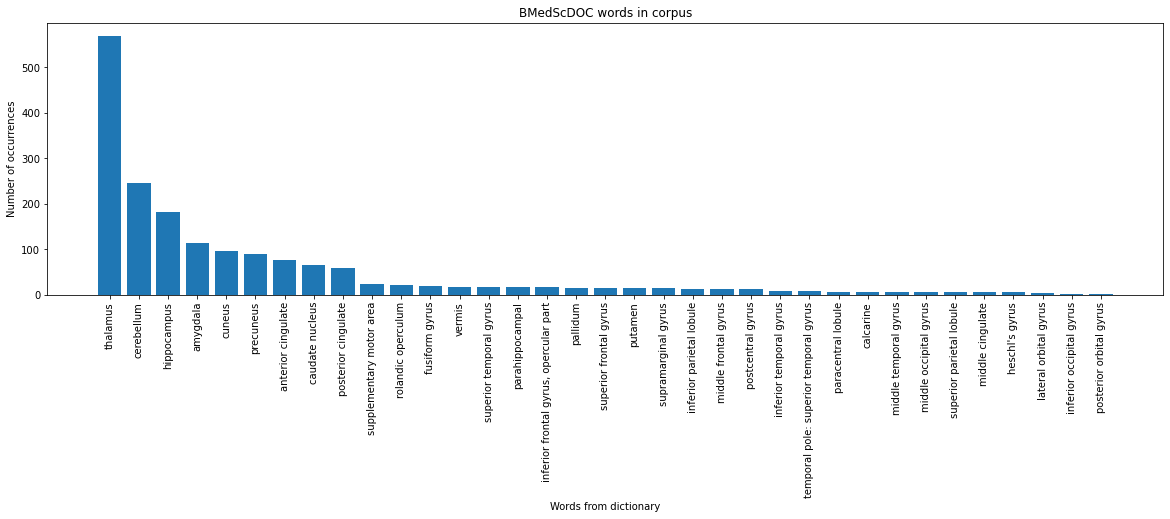

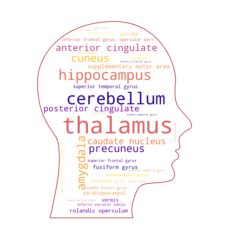

In [12]:
for_display = display(combined, replacement_path)

#output 2
functions.outputs.barchart(for_display, save_location)

#output 3
functions.outputs.wc(for_display)